In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opencv-python
!pip install tensorflow
!pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [5]:
import zipfile

data_zip_path = "/content/drive/MyDrive/Colab Notebooks/Sign Language Gesture Images Dataset/Gesture Image Data.zip"
extract_dir = "/tmp/asl_images"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

extracted_contents = os.listdir(extract_dir)

In [6]:
image_labels = []
with open("/content/drive/MyDrive/Colab Notebooks/Sign Language Gesture Images Dataset/sign labels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['0', '1', '2', '3', '4']

In [7]:
print(image_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']


In [8]:
print("Extracted contents:", extracted_contents)
print("Extracted path:", extract_dir)

Extracted contents: ['Gesture Image Data']
Extracted path: /tmp/asl_images


In [9]:
import pathlib

# Assuming this is your actual directory
extract_dir = "/tmp/asl_images/Gesture Image Data"
data_dir = pathlib.Path(extract_dir)

# Use relative paths with data_dir / subfolder / '*'
sign_images_dict = {
    label: list((data_dir / label).glob('*'))
    for label in image_labels}#['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','_']

In [10]:
len(sign_images_dict)

37

In [11]:
# import string

# characters = string.digits + string.ascii_uppercase + '_'  # string.digits ='0'-'9', string.ascii_uppercase = 'A'-'Z', '_'
sign_labels_dict = {char: idx for idx, char in enumerate(image_labels)}

In [15]:
# sign_labels_dict = {'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,'9': 9,'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,'N':23,'O':24,'P':25,'Q':26,'R':27,'S':28,'T':29,'U':30,'V':31,'W':32,'X':33,'Y':34,'Z':35,'_':36}

In [12]:
print(sign_labels_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, '_': 36}


In [13]:
X, y = [], []

for sign_name, images in sign_images_dict.items():
    print(f"Processing {sign_name} with {len(images)} images.") # Debug print
    for image in images:
        img = cv2.imread(str(image))
        if img is not None: # Check if image was loaded successfully
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            y.append(sign_labels_dict[sign_name])
        else:
            print(f"Warning: Could not load image {image}") # Debug print

print(f"Total images loaded: {len(X)}") # Debug print

Processing 0 with 1500 images.
Processing 1 with 1500 images.
Processing 2 with 1500 images.
Processing 3 with 1500 images.
Processing 4 with 1500 images.
Processing 5 with 1500 images.
Processing 6 with 1500 images.
Processing 7 with 1500 images.
Processing 8 with 1500 images.
Processing 9 with 1500 images.
Processing A with 1500 images.
Processing B with 1500 images.
Processing C with 1500 images.
Processing D with 1500 images.
Processing E with 1500 images.
Processing F with 1500 images.
Processing G with 1500 images.
Processing H with 1500 images.
Processing I with 1500 images.
Processing J with 1500 images.
Processing K with 1500 images.
Processing L with 1500 images.
Processing M with 1500 images.
Processing N with 1500 images.
Processing O with 1500 images.
Processing P with 1500 images.
Processing Q with 1500 images.
Processing R with 1500 images.
Processing S with 1500 images.
Processing T with 1500 images.
Processing U with 1500 images.
Processing V with 1500 images.
Processi

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1 ,stratify=y ,random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
# # Option 1: Save as .npy files (recommended for numerical data)
# # Save scaled X and y
# np.save('X_train_scaled.npy', X_train_scaled)
# np.save('X_test_scaled.npy', X_test_scaled)
# np.save('y_train.npy', y_train)
# np.save('y_test.npy', y_test)

In [ ]:
# # Load scaled X and y
# X_train_scaled = np.load('X_train_scaled.npy')
# X_test_scaled = np.load('X_test_scaled.npy')
# y_train = np.load('y_train.npy')
# y_test = np.load('y_test.npy')

In [16]:
# Option 2: Save all together using pickle
import pickle

# Save all in one file
with open('scaled_data.pkl', 'wb') as f:
    pickle.dump((X_train_scaled, X_test_scaled, y_train, y_test), f)

In [ ]:
# # Load scaled X and y
# with open('scaled_data.pkl', 'rb') as f:
#     X_train_scaled, X_test_scaled, y_train, y_test = pickle.load(f)

In [17]:
len(np.unique(y_train))

37

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

# Define image shape
target_size = (224, 224)  # Use actual input size
input_channels = 3        # RGB images

# Initialize the model
my_model = Sequential()

# Define input shape using Input layer
my_model.add(Input(shape=(target_size[0], target_size[1], input_channels)))

# Add Conv and Pooling layers
my_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

my_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

my_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
my_model.add(Flatten())
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Output layer with softmax
num_classes = len(np.unique(y_train))
my_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary
my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,173,733 (42.62 MB)

 Trainable params: 11,173,733 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Now train the model
my_model.fit(X_train_scaled,y_train,epochs=3,validation_data=(X_test_scaled, y_test),verbose=1)#batch_size=32,

Epoch 1/3
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 692s 442ms/step - accuracy: 0.8240 - loss: 0.6224 - val_accuracy: 0.9973 - val_loss: 0.0070
Epoch 2/3
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 670s 429ms/step - accuracy: 0.9864 - loss: 0.0387 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 3/3
1561/1561 ━━━━━━━━━━━━━━━━━━━━ 671s 429ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 3.5902e-04


In [35]:
my_NN_training_accuracy = my_model.evaluate(X_train_scaled, y_train, verbose=1)#[1]  # Evaluate on training data
my_NN_testing_accuracy = my_model.evaluate(X_test_scaled, y_test, verbose=1)#[1]  # Evaluate on testing data

1561/1561 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.9999 - loss: 3.9966e-04
174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 1.0000 - loss: 4.1560e-04


In [37]:
print(f"Trining accuracy: {my_NN_training_accuracy[1]}")
print(f"Testing accuracy: {my_NN_testing_accuracy[1]}")

Trining accuracy: 0.9998798966407776
Testing accuracy: 1.0


In [32]:
my_model.save("my_sign_language_model.h5")

In [34]:
my_model.save_weights('my_model.weights.h5')

In [38]:
from tensorflow.keras.models import load_model

model = load_model('my_sign_language.h5')  # or 'my_trained_model'

In [52]:
pred = model.predict(X_test_scaled[1:2])
predicted_class = np.argmax(pred, axis=1)[0]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: 4


array([[[ 48,  87, 125],
        [ 48,  87, 125],
        [ 48,  87, 125],
        ...,
        [ 98, 119, 141],
        [ 98, 119, 141],
        [ 98, 119, 141]],

       [[ 48,  87, 125],
        [ 48,  87, 125],
        [ 48,  87, 125],
        ...,
        [ 98, 119, 141],
        [ 98, 119, 141],
        [ 98, 119, 141]],

       [[ 48,  87, 125],
        [ 48,  87, 125],
        [ 49,  87, 125],
        ...,
        [ 97, 119, 141],
        [ 98, 119, 141],
        [ 98, 119, 141]],

       ...,

       [[ 59,  82, 108],
        [ 59,  82, 108],
        [ 59,  82, 108],
        ...,
        [ 56,  80,  92],
        [ 56,  80,  92],
        [ 56,  80,  92]],

       [[ 59,  82, 108],
        [ 59,  82, 108],
        [ 59,  82, 108],
        ...,
        [ 55,  79,  91],
        [ 55,  79,  91],
        [ 55,  79,  91]],

       [[ 59,  82, 108],
        [ 59,  82, 108],
        [ 59,  82, 108],
        ...,
        [ 55,  79,  91],
        [ 55,  79,  91],
        [ 55,  79,  91]]], dtype=uint8)
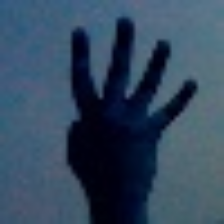

In [47]:
X_test[1]

In [40]:
y_test[1]

np.int64(4)

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.layers import Lambda

mobilenet_model = tf.keras.Sequential([
    Lambda(lambda x:hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2",
                   trainable=False)(x)),  # Can be True, see below.
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')])
mobilenet_model.build([None, 224, 224, 3])

mobilenet_model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
mobilenet_model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_test_scaled, y_test))

Epoch 1/5
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 675s 436ms/step - acc: 0.9409 - loss: 0.3421
Epoch 2/5
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 673s 442ms/step - acc: 0.9999 - loss: 0.0035
Epoch 3/5
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 661s 435ms/step - acc: 1.0000 - loss: 0.0011
Epoch 4/5
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 663s 436ms/step - acc: 1.0000 - loss: 4.6333e-04
Epoch 5/5
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 664s 437ms/step - acc: 1.0000 - loss: 2.1611e-04


In [ ]:
m.save("sign_language_model.h5")  # Save model

# Define my CNN

In [ ]:
import numpy as np

# Load the .npy file
y_train = np.load('y_train.npy')
y_test = np.load("y_test.npy")

# Check the contents
print(type(y_train))   # usually <class 'numpy.ndarray'>
print(y_train.shape)   # shape of the array
print(y_train[:5])     # first 5 elements

In [ ]:
len(y_train)

In [ ]:
len(y_test)

In [ ]:
len(y_train) + len(y_test)

In [ ]:
# Recreate the same model structure used during training
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')])

In [ ]:
m.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])